In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt

variablesKey = 'Validators'
variablesSplit = 'l2_relative_error_'
validatorsRename = {'validator':'r1.0','validator_2':'r0.85','validator_3':'r0.75'}
variablesID = 'validator'
subfolders = ['Baseline','SGM_SPADE','SPADE_clusters_Only','SGM_Only']

# run aggregates with these subfoldetrs
#folder = 'C:/Users/jacec/Documents/Test_Runs/'
folder = 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/'
aggregates = [folder+f+'/aggregates/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
#all results will be in /aggregates, separated by tags from subfolders
#find all validation files separated by subfolder
files = []
#for i in aggregates:
#    csvs_by_testcase = [[i + g for g in os.listdir(i) if (g.endswith('.csv')) and (variablesKey in g) and (f in g)] for f in subfolders]
#    files = files+[i for i in csvs_by_testcase if i]
files = [[i+g for g in os.listdir(i) if g.endswith('.csv') and (variablesKey in g)] for i in aggregates]
#files = [[aggregates + g for g in os.listdir(aggregates) if ('.csv' in g) and (f in g)] for f in subfolders] 
#list of lists of the files for each individual aggregation
#Go through sub-list, load into dataframes with descriptive columns
#Find unique variables, create sub-frames with them in a format for plotting



In [2]:
files

[['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_p-Baseline-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_p-SGM_Only-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_p-SGM_SPADE-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_p-SPADE_clusters_Only-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_u-Baseline-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_u-SGM_Only-512x1600_K30L7.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30

In [4]:
#each aggregate becomes one dataframe
#extract common variable names (validator, validator_n, uvpvnu)
#load into df with descriptive columns, uses 'subfolder' name, validator name, variable name
dataframes = []
agNames = []
for aggregation in files:
    dfs = []
    agName = aggregation[0].split('/aggregates/')[0].split('/')[-1]
    for testName in subfolders:
        subtests = [csv for csv in aggregation if testName in csv]
        if not subtests:
            continue
        print(subtests)
        for k,i in enumerate(subtests):
            validatorName = i.split(variablesKey)[1].split(variablesSplit)[0]
            vv = i.split(variablesSplit)[1].split('-'+testName)[0]
            variableName = f'{testName}_{validatorsRename[validatorName]}_{vv}_'
            print(variableName)
            #df = pd.read_csv(i, index_col = 0, delimiter=';')
            df = pd.read_csv(i, delimiter=';')
            oldcols = df.keys()
            print(oldcols)
            #mapping = {i:variableName+i for i in oldcols[0:-1]}
            mapping = {'Unnamed: 0':variableName+'step'}
            if k == 0:
                mapping.update({'wall_time':testName+'_wall_time'})
            mapping.update({i:variableName+i for i in oldcols[1:-1]})
            print(mapping)
            df.rename(columns=mapping, inplace=True)
            newcols = df.keys()
            print(newcols)
            if k > 0:
                df.drop(columns='wall_time')
            dfs.append(df)
    df = pd.concat(dfs, axis=1)
    df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicates based on column name alone
    #append to dataframes list
    dataframes.append(df)
    agNames.append(agName)

['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_p-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_u-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidatorl2_relative_error_v-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidator_2l2_relative_error_p-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidator_2l2_relative_error_u-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Validatorsvalidator_2l2_relative_error_v-Baseline-512x1600_K30L7.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/512x1600_K30L7/aggregates/Valid

In [5]:
dataframes[0]
agNames

['512x1600_K30L7']

[['Baseline_r1.0_p_step', 'Baseline_r1.0_p_mean', 'SGM_SPADE_r1.0_p_mean', 'SPADE_clusters_Only_r1.0_p_mean', 'SGM_Only_r1.0_p_mean'], ['Baseline_r0.85_p_step', 'Baseline_r0.85_p_mean', 'SGM_SPADE_r0.85_p_mean', 'SPADE_clusters_Only_r0.85_p_mean', 'SGM_Only_r0.85_p_mean'], ['Baseline_r0.75_p_step', 'Baseline_r0.75_p_mean', 'SGM_SPADE_r0.75_p_mean', 'SPADE_clusters_Only_r0.75_p_mean', 'SGM_Only_r0.75_p_mean']]


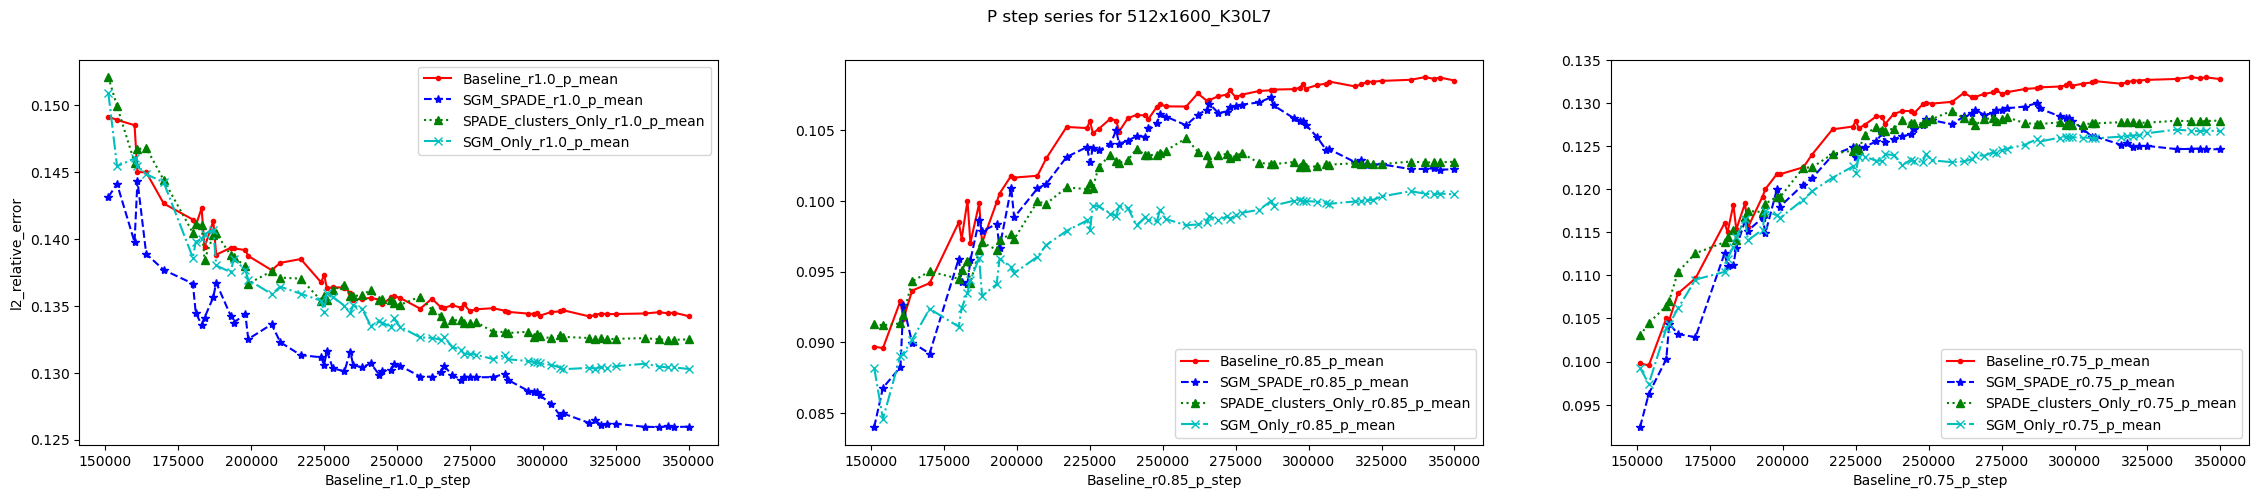

In [44]:
#plot step series p
plotVars_p_allValidators = [[f'Baseline_{j}_p_step'] + [f'{i}_{j}_p_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0]['Baseline_r1.0_p_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (28,5))
    fig.suptitle(f'P step series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error')
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k])

[['Baseline_r1.0_u_step', 'Baseline_r1.0_u_mean', 'SGM_SPADE_r1.0_u_mean', 'SPADE_clusters_Only_r1.0_u_mean', 'SGM_Only_r1.0_u_mean'], ['Baseline_r0.85_u_step', 'Baseline_r0.85_u_mean', 'SGM_SPADE_r0.85_u_mean', 'SPADE_clusters_Only_r0.85_u_mean', 'SGM_Only_r0.85_u_mean'], ['Baseline_r0.75_u_step', 'Baseline_r0.75_u_mean', 'SGM_SPADE_r0.75_u_mean', 'SPADE_clusters_Only_r0.75_u_mean', 'SGM_Only_r0.75_u_mean']]


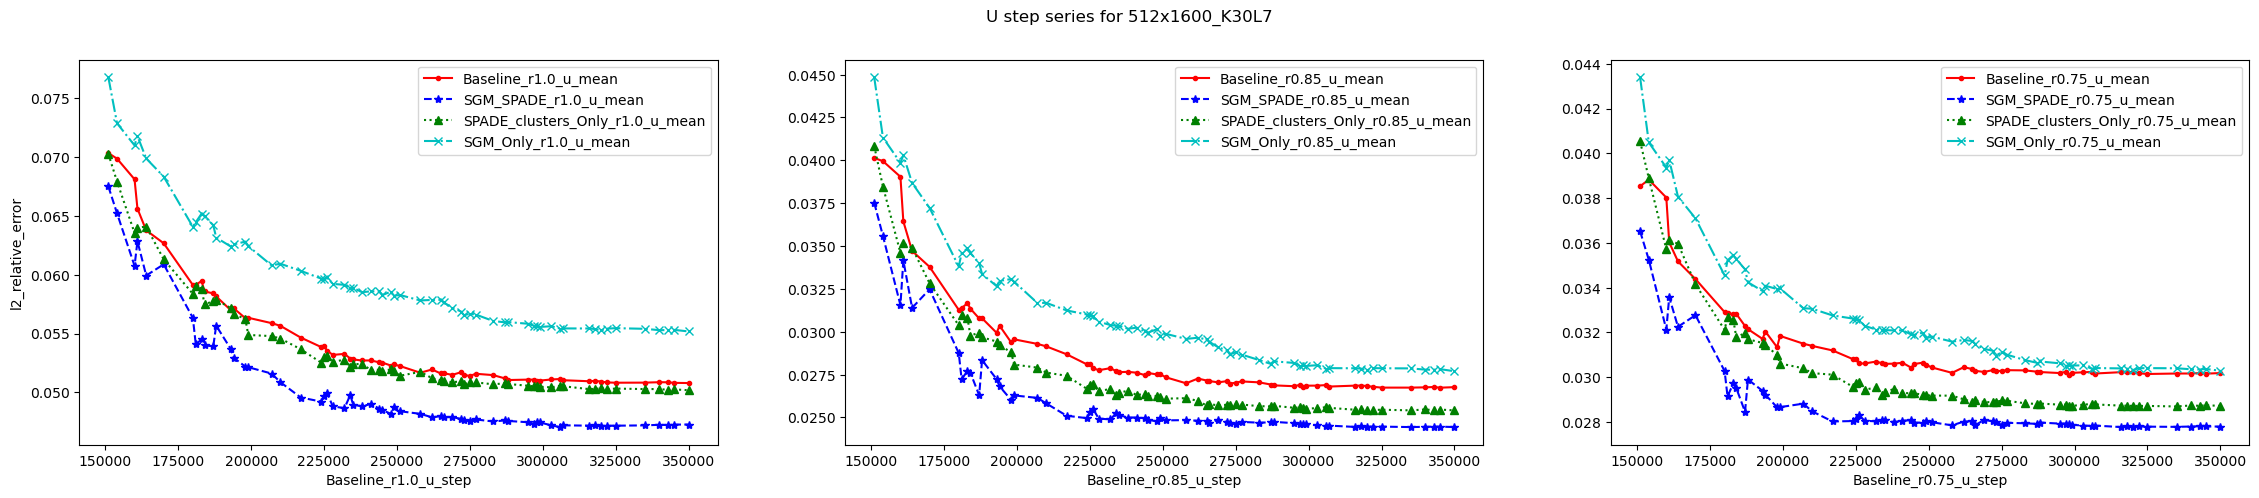

In [45]:
#plot step series u
plotVars_p_allValidators = [[f'Baseline_{j}_u_step'] + [f'{i}_{j}_u_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0]['Baseline_r1.0_u_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (28,5))
    fig.suptitle(f'U step series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error')
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k])

[['Baseline_r1.0_v_step', 'Baseline_r1.0_v_mean', 'SGM_SPADE_r1.0_v_mean', 'SPADE_clusters_Only_r1.0_v_mean', 'SGM_Only_r1.0_v_mean'], ['Baseline_r0.85_v_step', 'Baseline_r0.85_v_mean', 'SGM_SPADE_r0.85_v_mean', 'SPADE_clusters_Only_r0.85_v_mean', 'SGM_Only_r0.85_v_mean'], ['Baseline_r0.75_v_step', 'Baseline_r0.75_v_mean', 'SGM_SPADE_r0.75_v_mean', 'SPADE_clusters_Only_r0.75_v_mean', 'SGM_Only_r0.75_v_mean']]


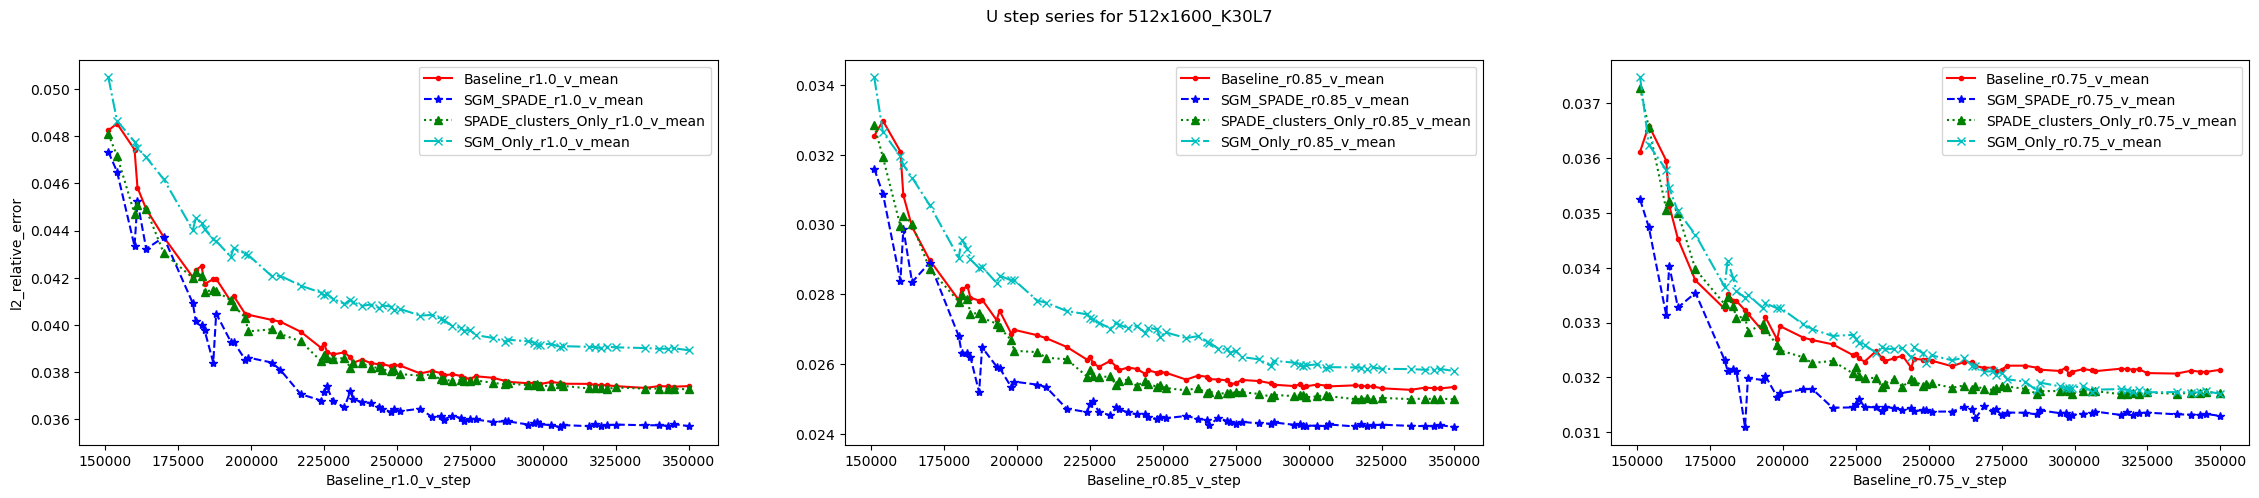

In [46]:
#plot step series v 
plotVars_p_allValidators = [[f'Baseline_{j}_v_step'] + [f'{i}_{j}_v_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0]['Baseline_r1.0_v_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (28,5))
    fig.suptitle(f'U step series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error')
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k])

In [ ]:
#save new DF for convenience
#new_df.to_csv(f'C:\\Users\\John Anticev\\OneDrive - stevens.edu\\SIMNET\\{folder}\\output.csv')
import matplotlib.pyplot as plt
rawdat = dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_wall_time','test_wall_time',
                        'SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
              ][dataframes[0]['SGM_SPADE_validator_2_p_step'] >= 150000]
rawdat.loc[:,'SGM_SPADE_wall_time'] = (rawdat.loc[:,'SGM_SPADE_wall_time'] - rawdat.loc[0,'SGM_SPADE_wall_time'])/60/60
rawdat.loc[:,'test_wall_time'] = (rawdat.loc[:,'test_wall_time'] - rawdat.loc[0,'test_wall_time'])/60/60
#.plot(x='SGM_SPADE_validator_2_p_step', y = 'SGM_SPADE_validator_2_p_mean')

#[dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000]

ax = rawdat.plot(x='SGM_SPADE_wall_time', y = 'SGM_SPADE_validator_2_p_mean')
rawdat.plot(x='test_wall_time', y = 'test_validator_2_p_mean', ax=ax)
plt.show()

KeyError: 0